In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pyproj import Transformer
import requests
import plotly.graph_objects as go
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import seaborn as sns


In [2]:
weer_api = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\apidata_2021.csv")
weer= pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\weerstations_noordholland_v.2.csv", sep= ";")
weer = gpd.GeoDataFrame(weer, geometry=gpd.GeoSeries.from_wkt(weer['WKT']))
weer['STN']=weer['STN_y']
weer.drop(columns=['WKT', 'STN_x', 'STN_y'], inplace=True)
hectointervallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\hectointervallen.txt") 
hectointervallen = hectointervallen[hectointervallen.nunique()[hectointervallen.nunique() != 1].index]
hectopunten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\hectopunten.txt") 
hectopunten = hectopunten[hectopunten.nunique()[hectopunten.nunique() != 1].index]
juncties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\juncties.txt") 
juncties = juncties[juncties.nunique()[juncties.nunique() != 1].index]
puntlocaties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\puntlocaties.txt") 
puntlocaties = puntlocaties[puntlocaties.nunique()[puntlocaties.nunique() != 1].index]
ongevallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Ongevallengegevens\ongevallen.txt", encoding="ISO-8859-15")
ongevallen = ongevallen[ongevallen.nunique()[ongevallen.nunique() != 1].index]
ongevallen.drop(columns=['PVOPGEM', 'WVL_ID','WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN',
                         'LGD_ID', 'BZD_ID_VM1','BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', 'BZD_ID_IF2',
                         'BZD_ID_IF3', 'BZD_IF_AN', 'BZD_ID_TA1', 'BZD_ID_TA2', 'BZD_ID_TA3', 'HUISNUMMER'], inplace=True)


C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\2897929023.py:14: DtypeWarning: Columns (1,24,39) have mixed types. Specify dtype option on import or set low_memory=False.
  ongevallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Ongevallengegevens\ongevallen.txt", encoding="ISO-8859-15")


In [3]:
samengevoegd_df = ongevallen.merge(juncties, on='JTE_ID', how='left')
samengevoegd_df['FK_VELD5']=samengevoegd_df['FK_VELD5_y']
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
df= samengevoegd_df
samengevoegd_df = df[df.nunique()[df.nunique() != 1].index]
samengevoegd_df.drop(columns=['AP4_CODE', 'AP5_CODE', 'FK_VELD5_y', 'X_COORD_y', 'Y_COORD_y', 
                              'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'DATUM_VKL', 'DAG_CODE', 'MND_NUMMER',
                              'TIJDSTIP', 'UUR', 'DDL_ID', 'DAGTYPE', 'WEEKNR',
                              'ANTL_SEH','ANTL_GOV','ANTL_TDT', 'MNE_CODE', 'ZAD_ID', 'WGD_CODE_2',
                              'IND_ALC'], inplace=True)

df= samengevoegd_df
# df.columns
df2=df[['X_COORD_x', 'Y_COORD_x', 'VKL_NUMMER', 'AP3_CODE', 'ANTL_PTJ', 'AOL_ID', 'BEBKOM', 'WGD_CODE_1']]
df2['X']=df2['X_COORD_x']
df2['Y']=df2['Y_COORD_x']
df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3343418178.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X']=df2['X_COORD_x']
C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3343418178.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Y']=df2['Y_COORD_x']
C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3343418178.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [4]:
trans = Transformer.from_crs("ETRS89", "EPSG:4326", always_xy=True)
xx, yy = trans.transform(df2["X"].values, df2["Y"].values)

df2["X"] = xx
df2["Y"] = yy
df2["X"] = (df2["X"]/64000)+3
df2["Y"] = (df2["Y"]/110000)+48
# df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

df2=df2[['X', 'Y', 'VKL_NUMMER', 'AP3_CODE', 'ANTL_PTJ', 'AOL_ID', 'BEBKOM', 'WGD_CODE_1']]
df2.dropna()
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.X, df2.Y))
gdf.dropna()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3967659008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["X"] = xx
C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3967659008.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Y"] = yy
C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3967659008.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,X,Y,VKL_NUMMER,AP3_CODE,ANTL_PTJ,AOL_ID,BEBKOM,WGD_CODE_1,geometry
8,5.698422,51.700464,20210000435,DOD,2,7,BI,D,POINT (5.69842 51.70046)
16,5.440999,51.761055,20210000567,DOD,2,7,BU,D,POINT (5.44100 51.76105)
17,6.486673,52.904554,20210000568,DOD,2,7,BU,D,POINT (6.48667 52.90455)
25,4.427013,51.588056,20210072804,UMS,2,7,BI,D,POINT (4.42701 51.58806)
29,6.990462,53.006926,20210074980,UMS,2,7,BI,D,POINT (6.99046 53.00693)
...,...,...,...,...,...,...,...,...,...
113144,5.783843,51.445289,20210027300,UMS,3,7,BU,D,POINT (5.78384 51.44529)
113147,6.821636,53.241292,20210027330,UMS,2,0,BI,D,POINT (6.82164 53.24129)
113150,4.806394,52.453405,20210027591,UMS,3,9,BI,D,POINT (4.80639 52.45340)
113151,4.558489,52.098595,20210027600,UMS,3,7,BI,D,POINT (4.55849 52.09860)


In [5]:
weer = pd.merge(weer, weer_api, on='station_id')
weer.drop(columns=['fid', 'Unnamed: 0', 'NAME'], inplace=True)


In [6]:

weer['datetime'] = pd.to_datetime(weer['datetime'], format='%Y-%m-%d %H:%M:%S')

weer['maand'] = weer['datetime'].dt.month
weer['dag'] = weer['datetime'].dt.day


In [7]:
weer['m/d/STN'] =weer['maand'].astype(str) + '/' + weer['dag'].astype(str)+ '/' + weer['STN'].astype(str)


In [8]:
weer2=weer.groupby('m/d/STN')["Windsnelheid (km/h)", 'Windrichting (Graden)', 'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)', 
                         'Regenval (mm/h)','Temperatuur (C)', 'Weercode', 'STN'].median()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\216662622.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weer2=weer.groupby('m/d/STN')["Windsnelheid (km/h)", 'Windrichting (Graden)', 'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)',


In [9]:
weer3 = weer[['STN', 'geometry']]

weer3 = weer3.drop_duplicates()

weer4 = pd.merge(weer2, weer3, on='STN')

weer_omtemergen= weer4

gdf = gdf.dropna()

weer_omtemergen = gpd.GeoDataFrame(weer_omtemergen, geometry=(weer_omtemergen['geometry']))

In [10]:
merged_gdf = gpd.sjoin(gdf, weer_omtemergen, predicate='within')


In [11]:
# # Plot de punten
# plt.scatter(merged_gdf['X'], merged_gdf['Y'], color='red', label='Punten')

# # Toon de plot
# plt.show()

In [27]:
# Selecteer de numerieke kolommen voor correlatieanalyse

numerical_columns = merged_gdf[['ANTL_PTJ', 'AOL_ID', 'Windsnelheid (km/h)','Windrichting (Graden)', 'Luchtdruk (ps)',
                     'Zichtbaarheid (Decimeter ver kunnen kijken)', 'Regenval (mm/h)','Temperatuur (C)', 'Weercode', 'STN']]


name = ['ANTL_PTJ', 'AOL_ID', 'Windsnelheid (km/h)','Windrichting (Graden)', 'Luchtdruk (ps)',
                     'Zichtbaarheid (Decimeter ver kunnen kijken)', 'Regenval (mm/h)','Temperatuur (C)', 'Weercode', 'STN']

# Bereken de correlatiematrix

correlation_matrix = numerical_columns.corr()


fig1 = go.Figure(data=go.Heatmap(


                   z=correlation_matrix.values,

                   x=name,

                   y=name,

                   colorscale='Blues',

                   zmin=0, zmax=1,
                   text=correlation_matrix.values, 
                   hoverongaps=True))

fig1

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\4101458376.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\4101458376.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\4101458376.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

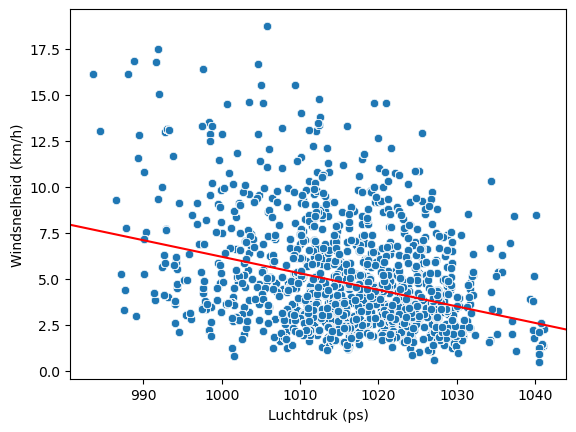

In [13]:
df=numerical_columns[['Windsnelheid (km/h)','Luchtdruk (ps)']]
df['y']=df['Windsnelheid (km/h)']
df['x']=df['Luchtdruk (ps)']
df.drop(columns=['Windsnelheid (km/h)','Luchtdruk (ps)'], inplace=True)
df = df.replace(0, np.NaN)

df= df.dropna()
model = smf.ols(formula= 'y~x', data=df).fit()
model.summary()
ax = sns.scatterplot(x=df.x, y=df.y)
sm.graphics.abline_plot(model_results=model, ax=ax, color= "red")
ax.set(ylabel="Windsnelheid (km/h)", xlabel="Luchtdruk (ps)")
plt.show()

In [14]:
df=numerical_columns[['Windsnelheid (km/h)','Windrichting (Graden)']]
df['y']=df['Windsnelheid (km/h)']
df['x']=df['Windrichting (Graden)']
df.drop(columns=['Windsnelheid (km/h)','Windrichting (Graden)'], inplace=True)

model = smf.ols(formula= 'y~x', data=df).fit()
model.summary()



C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3002726659.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3002726659.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3002726659.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                 1.903e+06
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:32:23   Log-Likelihood:            -3.3440e+06
No. Observations:             1593955   AIC:                         6.688e+06
Df Residuals:                 1593953   BIC:                         6.688e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4351      0.002    234.047      0.000       0.431       0.439
x              0.0199   1.44e-05   1379.558      0.000       0.020       0.020
==============================================================================
Omnibus:                   714149.276   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4920307.823
Skew:                           2.040   Prob(JB):                         0.00
Kurtosis:                      10.579   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.predict(pd.DataFrame({'x': [970,980,1050,1060]}))

0    19.713101
1    19.911843
2    21.303041
3    21.501783
dtype: float64

In [16]:
df=numerical_columns[['Zichtbaarheid (Decimeter ver kunnen kijken)','ANTL_PTJ']]
df['y']=df['ANTL_PTJ']
df['x']=df['Zichtbaarheid (Decimeter ver kunnen kijken)']
df.drop(columns=['Zichtbaarheid (Decimeter ver kunnen kijken)','ANTL_PTJ'], inplace=True)

model = smf.ols(formula= 'y~x', data=df).fit()
model.summary()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3039701640.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3039701640.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_22208\3039701640.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     386.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.24e-86
Time:                        10:32:24   Log-Likelihood:            -1.1998e+06
No. Observations:             1593955   AIC:                         2.400e+06
Df Residuals:                 1593953   BIC:                         2.400e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0295      0.001   3274.897      0.000       2.028       2.031
x           5.106e-07    2.6e-08     19.667      0.000     4.6e-07    5.62e-07
==============================================================================
Omnibus:                   317761.956   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4183857.952
Skew:                           0.585   Prob(JB):                         0.00
Kurtosis:                      10.850   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

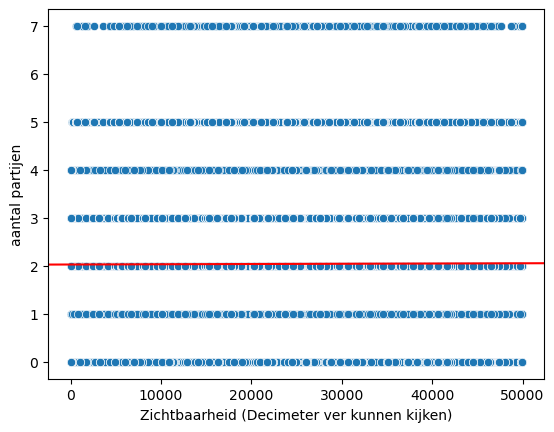

In [17]:

ax = sns.scatterplot(x=df['x'], y=df['y'])
ax.set(xlabel="Zichtbaarheid (Decimeter ver kunnen kijken)", ylabel="aantal partijen")

sm.graphics.abline_plot(model_results=model, ax=ax, color="red")
plt.show()

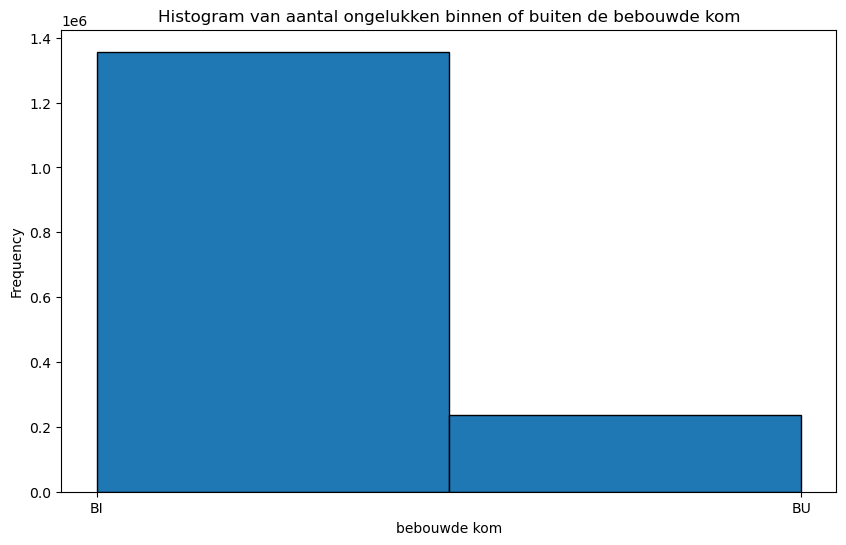

In [23]:
# import matplotlib.pyplot as plt

# Assuming merged_gdf is your GeoDataFrame
plt.figure(figsize=(10, 6))
plt.hist(merged_gdf['BEBKOM'], bins=2, edgecolor='black')
plt.xlabel('bebouwde kom')
plt.ylabel('Frequency')
plt.title('Histogram van aantal ongelukken binnen of buiten de bebouwde kom')
plt.show()
